**     Image Quality Metrics**

## 1. PSNR (Peak Signal-to-Noise Ratio)

PSNR stands for Peak Signal-to-Noise Ratio. It is a common metric used to measure the quality of an image after compression or processing. It quantifies the difference between the original and the 'noisy' or distorted version resulting from compression. A higher PSNR value means the signal (original image) is stronger compared to the noise (distorted image), signifying better quality.

### How PSNR is Calculated

To calculate the Peak Signal-to-Noise Ratio (PSNR), we follow a two-step process:

### **Step 1: Calculate the Mean Squared Error (MSE)**

The Mean Squared Error (MSE) quantifies the average of the squares of the differences between the pixel values of the original image and the processed (or noisy) image. A lower MSE indicates less error.

$$ MSE = \frac{1}{mn} \sum_{i=1}^{m} \sum_{j=1}^{n} (I_{orig}(i,j) - I_{proc}(i,j))^2 $$

Where:
*   $I_{orig}(i,j)$: The pixel value at position $(i,j)$ in the **original image**.
*   $I_{proc}(i,j)$: The pixel value at position $(i,j)$ in the **processed image**.
*   $m$: The number of rows (height) of the image.
*   $n$: The number of columns (width) of the image.

### **Step 2: Calculate PSNR**

Once the MSE is calculated, the PSNR is determined using the following formula. PSNR is expressed in decibels (dB) and a higher value indicates a better quality image.

$$ PSNR = 10 \cdot \log_{10} \left( \frac{MAX^2}{MSE} \right) $$

Where:
*   $MAX$: The **maximum possible pixel value** of the image. For example, in an 8-bit grayscale image, $MAX$ would be 255.

### **Key Considerations:**
*   **Unit:** PSNR is measured in **Decibels (dB)**.
*   **Typical Range:** For image compression, PSNR values commonly range from 30 dB to 50 dB; generally, a higher PSNR value indicates a higher quality image.
*   **Limitations:** PSNR is a purely mathematical metric and treats all errors equally. It does not account for the complexities of human visual perception. Therefore, two images with the same PSNR might be perceived very differently in terms of quality by a human observer.

### Calculate PSNR


In [ ]:
import numpy as np
import math

def calculate_psnr(img1, img2):
    """
    Calculate Peak Signal-to-Noise Ratio between two images

    Mathematical Formulation:
    MSE = (1/mn) * ΣΣ [I1(i,j) - I2(i,j)]²
    PSNR = 10 * log10(MAX² / MSE)

    Parameters:
    img1, img2: numpy arrays of the same shape

    Returns:
    PSNR value in decibels (higher is better)
    """
    # Convert to float for precise calculations
    img1 = img1.astype(np.float64)
    img2 = img2.astype(np.float64)

    # Calculate Mean Squared Error
    # MSE = (1/N) * Σ(x₁ - x₂)²
    mse = np.mean((img1 - img2) ** 2)

    # If images are identical, return infinity
    if mse == 0:
        return float('inf')

    # PSNR = 10 * log10(MAX² / MSE)
    # Using 20*log10(MAX/sqrt(MSE)) is equivalent
    max_pixel = 255.0
    psnr = 20 * math.log10(max_pixel / math.sqrt(mse))

    return psnr

## 2. SSIM (Structural Similarity Index)

**SSIM** stands for **Structural Similarity Index**. It's a perception-based model that considers image degradation as perceived change in structural information, rather than just raw pixel differences. Unlike PSNR, which measures absolute errors, SSIM attempts to model the perceived change in image structure.

### **Why SSIM is an alternative to PSNR:**

PSNR measures pixel-by-pixel differences, treating all errors equally. This often doesn't align with human visual perception. SSIM, however, takes into account three key factors that are crucial to how humans perceive images:

1.  **Luminance:** How bright or dark the image is.
2.  **Contrast:** The difference in brightness between objects or regions.
3.  **Structure:** The patterns and textures within the image.

SSIM calculates these three components between two images (original and processed) and then combines them into a single score. The score typically ranges from 0 to 1, where:

*   **1:** Indicates perfect structural similarity (the images are identical).
*   **0:** Indicates no structural similarity.

### **Advantages of SSIM over PSNR:**

*   **Perceptual Accuracy:** SSIM correlates better with the human visual system's judgment of image quality than PSNR.
*   **Focus on Structure:** It emphasizes the structural information of an image, which is vital for human perception.
*   **Relative Measurement:** Instead of absolute error, it measures the *similarity* of structure, luminance, and contrast.

### **Limitations of SSIM:**

While generally better perceptually, SSIM can sometimes produce counter-intuitive results in specific scenarios, and it doesn't account for all aspects of visual quality (e.g., color distortions).

In summary, while PSNR is useful for mathematical comparisons, SSIM often provides a more reliable indicator of perceived image quality for human observers.

### **SSIM Formula**

The Structural Similarity Index (SSIM) analyzes image degradation by comparing three key components: **luminance**, **contrast**, and **structure** between two windows, $x$ and $y$, of common size $N \times N$.

**1. Luminance Comparison ($l(x,y)$):**
This component assesses the similarity in brightness between the two windows.
$$ l(x,y) = \frac{2\mu_x\mu_y + C_1}{\mu_x^2 + \mu_y^2 + C_1} $$

**2. Contrast Comparison ($c(x,y)$):**
This component measures the similarity in the local contrast (variation of brightness) between the two windows.
$$ c(x,y) = \frac{2\sigma_x\sigma_y + C_2}{\sigma_x^2 + \sigma_y^2 + C_2} $$

**3. Structure Comparison ($s(x,y)$):**
This component evaluates the correlation between the two windows after luminance and contrast are removed, focusing on structural patterns.
$$ s(x,y) = \frac{\sigma_{xy} + C_3}{\sigma_x\sigma_y + C_3} $$

**Combined SSIM:**
The overall SSIM score is then calculated by combining these three components:
$$ SSIM(x,y) = [l(x,y)]^{\alpha} \cdot [c(x,y)]^{\beta} \cdot [s(x,y)]^{\gamma} $$
In the simplified form (as commonly used, and when $\alpha = \beta = \gamma = 1$):
$$ SSIM(x,y) = \frac{(2\mu_x\mu_y + C_1)(2\sigma_{xy} + C_2)}{(\mu_x^2 + \mu_y^2 + C_1)(\sigma_x^2 + \sigma_y^2 + C_2)} $$

Where:
*   $\mu_x, \mu_y$: The mean intensities of windows $x$ and $y$, respectively.
*   $\sigma_x, \sigma_y$: The standard deviations of pixel intensities within windows $x$ and $y$, representing their contrast.
*   $\sigma_{xy}$: The covariance between windows $x$ and $y$, representing their structural correlation.
*   $C_1 = (K_1L)^2$, $C_2 = (K_2L)^2$, and $C_3 = C_2/2$ (or sometimes also $(K_3L)^2$): Small constants to stabilize the division when denominators are close to zero. They prevent numerical instability.
    *   $L$: The dynamic range of the pixel values (e.g., 255 for 8-bit grayscale images).
    *   $K_1 = 0.01$ and $K_2 = 0.03$ are typically used as small constant values.

In [ ]:
import numpy as np
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt

def calculate_ssim(img1, img2):
    """
    Calculate Structural Similarity Index (SSIM) between two images.

    Parameters:
    img1, img2: numpy arrays of the same shape and type.

    Returns:
    SSIM value (float) where 1.0 means perfect similarity.
    """
    # Ensure images are float for SSIM calculation if they are not already
    img1_float = img1.astype(float)
    img2_float = img2.astype(float)

    # Calculate SSIM. data_range is important for correct normalization.
    # For 8-bit images, data_range is 255.
    # We also need to specify 'channel_axis' for color images.
    score = ssim(img1_float, img2_float, data_range=img2_float.max() - img2_float.min(), channel_axis=-1)
    return score


In [ ]:
!ls -l

In [ ]:
# @title
import matplotlib.pyplot as plt
import cv2 as cv
import json
import numpy as np
import matplotlib



class SeamCarver:
    def __init__(self, input_img, specifications) -> None:
        self.input_img = input_img
        self.specifications = specifications
        self.reqd_h = specifications["height"]
        self.reqd_w = specifications["width"]
        self.output_img = input_img.copy()
        self.img_h, self.img_w = input_img.shape[:2]

    def validate(self):
        print(f"Input Dimensions: {self.img_w} x {self.img_h}")
        print(f"Required Dimensions: {self.reqd_w} x {self.reqd_h}")
        return self.reqd_h <= self.img_h and self.reqd_w <= self.img_w

    def seam_carving_vertical(self, img, target_width):
        """Carve vertical seams from a given image array."""
        carved_img = img.copy() # Operate on a copy for each carving pass
        img_gray = cv.cvtColor(carved_img, cv.COLOR_BGR2GRAY).astype(np.float64)

        num_seams = img.shape[1] - target_width

        for i in range(num_seams):
            print(f"Removing vertical seam {i+1}/{num_seams}")
            H, W = img_gray.shape

            # Calculate energy map using Sobel filters
            gx = cv.Sobel(img_gray, cv.CV_64F, 1, 0, ksize=3)
            gy = cv.Sobel(img_gray, cv.CV_64F, 0, 1, ksize=3)
            energy = (np.abs(gx) + np.abs(gy)).astype(np.float64)

            # DP table
            dp = energy.copy()

            # Fill DP table
            for row in range(1, H):
                for col in range(W):
                    if col == 0:
                        dp[row, col] += min(dp[row-1, col], dp[row-1, col+1])
                    elif col == W-1:
                        dp[row, col] += min(dp[row-1, col-1], dp[row-1, col])
                    else:
                        dp[row, col] += min(dp[row-1, col-1], dp[row-1, col], dp[row-1, col+1])

            # Backtrack to find the seam
            seam = np.zeros(H, dtype=np.int32)
            seam[-1] = np.argmin(dp[-1]) # Start from the minimum in the last row

            for row in range(H-2, -1, -1):
                prev = seam[row+1]
                if prev == 0:
                    choices = [dp[row, prev], dp[row, prev+1]]
                    seam[row] = prev + np.argmin(choices)
                elif prev == W-1:
                    choices = [dp[row, prev-1], dp[row, prev]]
                    seam[row] = prev - 1 + np.argmin(choices)
                else:
                    choices = [dp[row, prev-1], dp[row, prev], dp[row, prev+1]]
                    seam[row] = prev - 1 + np.argmin(choices)

            # Remove seam
            img_gray = np.array([np.delete(img_gray[row], seam[row]) for row in range(H)])
            carved_img = np.array([np.delete(carved_img[row], seam[row], axis=0) for row in range(H)])

        return carved_img

    def seam_carving_horizontal(self, img, target_height):
        """Carve horizontal seams from a given image array.
        Implemented by rotating, applying vertical carving, and rotating back."""
        # Rotate image 90 degrees clockwise (transpose and flip vertically)
        rotated_img = cv.rotate(img, cv.ROTATE_90_CLOCKWISE)

        # Apply vertical seam carving on the rotated image
        # Target width for the rotated image is the target height for the original
        carved_rotated = self.seam_carving_vertical(rotated_img, target_height)

        # Rotate back 90 degrees counter-clockwise
        final_img = cv.rotate(carved_rotated, cv.ROTATE_90_COUNTERCLOCKWISE)
        return final_img

    def seam_carving(self):
        current_h, current_w = self.output_img.shape[:2]

        if self.reqd_w < current_w: # If we need to reduce width
            self.output_img = self.seam_carving_vertical(self.output_img, self.reqd_w)

        if self.reqd_h < current_h: # If we need to reduce height
            # We need to re-evaluate the current height after potential vertical carving
            self.output_img = self.seam_carving_horizontal(self.output_img, self.reqd_h)

    def show_images(self):
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.imshow(cv.cvtColor(self.input_img, cv.COLOR_BGR2RGB))
        plt.title("Original")
        plt.axis("off")

        plt.subplot(1, 2, 2)
        plt.imshow(cv.cvtColor(self.output_img, cv.COLOR_BGR2RGB))
        plt.title(f"Seam Carved ({self.output_img.shape[1]}x{self.output_img.shape[0]})")
        plt.axis("off")
        plt.show()

    def save_output(self, path="output.png"):
        cv.imwrite(path, self.output_img)


def main():
    # Create dummy data and specifications if not available
    try:
        input_img = cv.imread("human.png")
        with open("specifications.json") as f:
            specifications = json.load(f)
    except FileNotFoundError:
        print("Creating dummy image and specifications for demonstration.")
        input_img = np.random.randint(0, 256, (200, 300, 3), dtype=np.uint8) # 300x200 image
        specifications = {"height": 150, "width": 250}
        # Also create dummy files if needed for save_output to not error
        # import os
        # os.makedirs('data', exist_ok=True)
        # cv.imwrite('data/human.png', input_img)
        # with open('data/specifications.json', 'w') as f:
        #     json.dump(specifications, f)

    carver = SeamCarver(input_img, specifications)
    if not carver.validate():
        print("Required dimensions are larger than image dimensions. Please adjust specifications.")
        return

    # Perform seam carving (reduces width first, then height)
    carver.seam_carving()

    carver.show_images()
    carver.save_output("output_carved.png")


if __name__ == '__main__':
    main()

In [ ]:
# @title
import cv2 as cv
import numpy as np
import json

# --- Re-create the original image based on how it was generated in main() ---
original_image_path = "human.png"
original_image = None
specifications = None

try:
    # Try to load if it existed
    original_image = cv.imread(original_image_path)
    with open("data/specifications.json") as f:
        specifications = json.load(f)
    print(f"Loaded original image from {original_image_path}")
except FileNotFoundError:
    # If not found, recreate the dummy image used in main()
    print(f"Original image '{original_image_path}' not found. Recreating dummy original image (300x200)...")
    original_image = np.random.randint(0, 256, (200, 300, 3), dtype=np.uint8) # 300x200 image
    specifications = {"height": 150, "width": 250}

# --- Load the carved image ---
carved_image_path = "output_carved.png"
carved_image = cv.imread(carved_image_path)

if original_image is None or carved_image is None:
    print("Error: Could not load original or carved image. Please ensure files exist.")
else:
    # --- Ensure both images are in the same color space (if necessary) ---
    # Assuming seam carving outputs BGR, convert to RGB for consistency if needed, or grayscale
    original_image_rgb = cv.cvtColor(original_image, cv.COLOR_BGR2RGB)
    carved_image_rgb = cv.cvtColor(carved_image, cv.COLOR_BGR2RGB)

    # --- Resize original to match carved image dimensions for comparison ---
    # PSNR and SSIM require images of the same dimensions. Since seam carving changes dimensions,
    # we need to resize the original to match the carved image for a valid comparison.
    # Note: This comparison might not be ideal as it introduces scaling artifacts to the original.
    # A more accurate comparison for seam carving would evaluate specific regions or perception.

    carved_h, carved_w = carved_image_rgb.shape[:2]
    resized_original_rgb = cv.resize(original_image_rgb, (carved_w, carved_h), interpolation=cv.INTER_AREA)

    # --- Calculate PSNR and SSIM ---
    psnr_value = calculate_psnr(resized_original_rgb, carved_image_rgb)
    ssim_value = calculate_ssim(resized_original_rgb, carved_image_rgb)

    print(f"\nPSNR between resized original and carved image: {psnr_value:.2f} dB")
    print(f"SSIM between resized original and carved image: {ssim_value:.4f}")

Original image 'human.png' not found. Recreating dummy original image (300x200)...

PSNR between resized original and carved image: 8.35 dB
SSIM between resized original and carved image: 0.0143


In [ ]:
# @title
original_height, original_width, _ = original_image.shape
target_height = specifications["height"]
target_width = specifications["width"]

print(f"Original Image Dimensions: {original_width}x{original_height}")
print(f"Target Image Dimensions: {target_width}x{target_height}")
print(f"PSNR: {psnr_value:.2f}")
print(f"SSIM: {ssim_value:.4f}")

Original Image Dimensions: 300x200
Target Image Dimensions: 250x150
PSNR: 8.35
SSIM: 0.0143


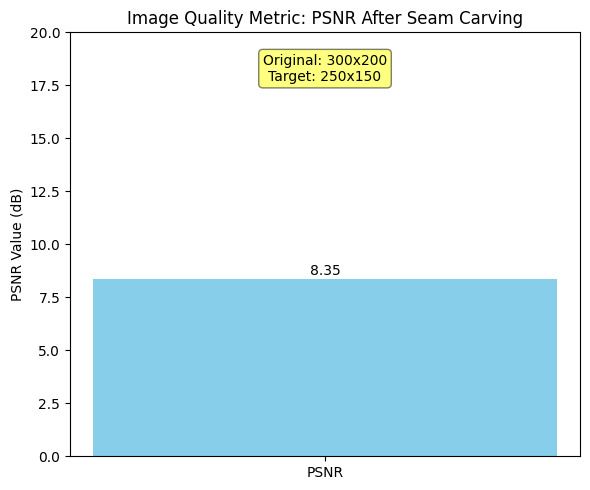

Generated PSNR bar chart with annotations.


In [ ]:
# @title
import matplotlib.pyplot as plt

# Prepare data for plotting
metric_name = 'PSNR'
metric_value = psnr_value

# Create the bar chart for PSNR
fig, ax = plt.subplots(figsize=(6, 5))
bar = ax.bar(metric_name, metric_value, color='skyblue')

# Set title and labels
ax.set_title('Image Quality Metric: PSNR After Seam Carving')
ax.set_ylabel('PSNR Value (dB)')

# Add annotation for the PSNR value on top of the bar
yval = bar[0].get_height()
ax.text(bar[0].get_x() + bar[0].get_width()/2, yval + 0.05, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

# Add annotations for image dimensions
annotation_text = f"Original: {original_width}x{original_height}\nTarget: {target_width}x{target_height}"
ax.text(0.5, 0.95, annotation_text, transform=ax.transAxes, fontsize=10, ha='center', va='top', bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.5))

# Set y-axis limits to better visualize the value
ax.set_ylim(0, max(metric_value * 1.2, 20)) # Adjust max for better visualization

# Display the plot
plt.tight_layout()
plt.show()
print("Generated PSNR bar chart with annotations.")

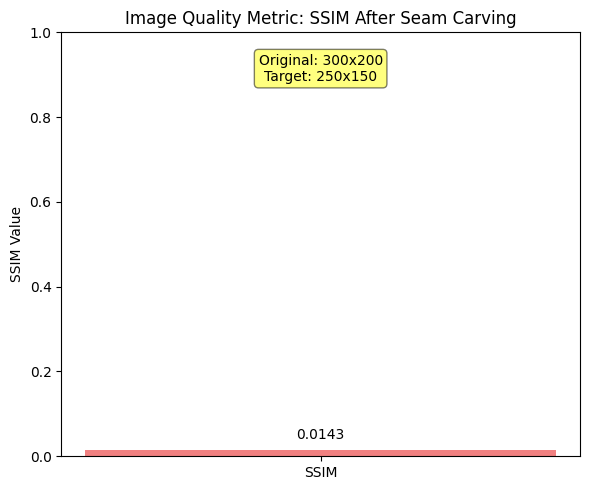

Generated SSIM bar chart with annotations.


In [ ]:
# @title
import matplotlib.pyplot as plt

# Prepare data for plotting
metric_name = 'SSIM'
metric_value = ssim_value

# Create the bar chart for SSIM
fig, ax = plt.subplots(figsize=(6, 5))
bar = ax.bar(metric_name, metric_value, color='lightcoral')

# Set title and labels
ax.set_title('Image Quality Metric: SSIM After Seam Carving')
ax.set_ylabel('SSIM Value')

# Add annotation for the SSIM value on top of the bar
yval = bar[0].get_height()
ax.text(bar[0].get_x() + bar[0].get_width()/2, yval + 0.02, f'{yval:.4f}', ha='center', va='bottom', fontsize=10)

# Add annotations for image dimensions
annotation_text = f"Original: {original_width}x{original_height}\nTarget: {target_width}x{target_height}"
ax.text(0.5, 0.95, annotation_text, transform=ax.transAxes, fontsize=10, ha='center', va='top', bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.5))

# Set y-axis limits to highlight the SSIM score range (0 to 1)
ax.set_ylim(0, 1)

# Display the plot
plt.tight_layout()
plt.show()
print("Generated SSIM bar chart with annotations.")


*   **PSNR Chart:** By having a dedicated chart, the PSNR value can be clearly presented with a y-axis scaled to its typical decibel (dB) range, allowing for precise annotation and an immediate understanding of the pixel-level fidelity. The annotation of original and target dimensions directly on the chart provides essential context for how the seam carving operation altered the image.
*   **SSIM Chart:** Similarly, a separate chart for SSIM ensures its y-axis is specifically set from 0 to 1, which is crucial for interpreting its perceptual quality score. This dedicated scaling emphasizes how close the image quality is to the ideal value of 1, without interference from the much larger numerical range of PSNR. The dimension annotations again provide direct information about the transformation alongside the quality metric.